In [18]:
import numpy as np
import pandas as pd

# from atomic_forces.average_atom.python.average_atom import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import load_NPA
from atomic_forces.average_atom.python.misc import jacobi_relaxation, sor
from atomic_forces.average_atom.python.grids import NonUniformGrid
# from atomic_forces.average_atom.python.average_atom import load_NPA
from atomic_forces.atomOFDFT.python.physics import ThomasFermi, FermiDirac

from importlib import reload
try:
    reload(physics)
    reload(grids)
    reload(average_atom_geometric)
#     reload(average_atom)
    reload(misc)
except NameError as e:
    from atomic_forces.atomOFDFT.python import physics as physics
    from atomic_forces.average_atom.python import average_atom_geometric as average_atom_geometric
#     from atomic_forces.average_atom.python import average_atom as average_atom
    from atomic_forces.average_atom.python import misc as misc
    from atomic_forces.average_atom.python import grids as grids
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)


import matplotlib.pyplot as plt

from hnc.hnc.constants import *

import cProfile

from hnc.hnc.misc import rs_from_n, n_from_rs


In [35]:
(2.721300e-03/4.512990e-26)/(cm_to_AU**3)/(AU_to_m**3)

6.029926944221014e+28

In [ ]:
Number density = 6.073804e+19 [N/m^3]
Atomic weight = 2.698153e+01 [a.u.]
Mass = 4.512990e-26 [kg]
Mass density = 2.721300e-03 [kg/cc]
Charge number/ionization degree = 3.0000
Charge = 4.806530e-19 [C]
Temperature = 1.160452e+04 [K] = 1.000000e+00 [eV]
Debye length =  3.179564e-07 [m]
Plasma frequency =  5.925916e+09 [rad/s]

In [41]:
3*n_from_rs(rs)*AU_to_invcc*1e6, rs_from_n(3*n_from_rs(rs))*AU_to_m

(1.8157722916278655e+29, 1.0955108134740027e-10)

In [17]:
# Aluminum 
name='Al'
Z, A = 13, 27 
T_eV = 1 
T_AU = T_eV*eV_to_AU
rs = 2.985767276908717

####
R = 20*rs

aa_tfd = NPA(Z, A, T_AU, rs, rs, initialize=True, gradient_correction=None, μ_init = 0.158, Zstar_init = 3.2, rmin=2e-2 ,Npoints=300, name=name,ignore_vxc=False)
npa_tfd = NPA(Z, A, T_AU, rs, R, initialize=True, gradient_correction=None,  Zstar_init = 3.3, rmin=1e-2 ,Npoints=2000, name=name,ignore_vxc=False)

NameError: name 'n_from_rs' is not defined

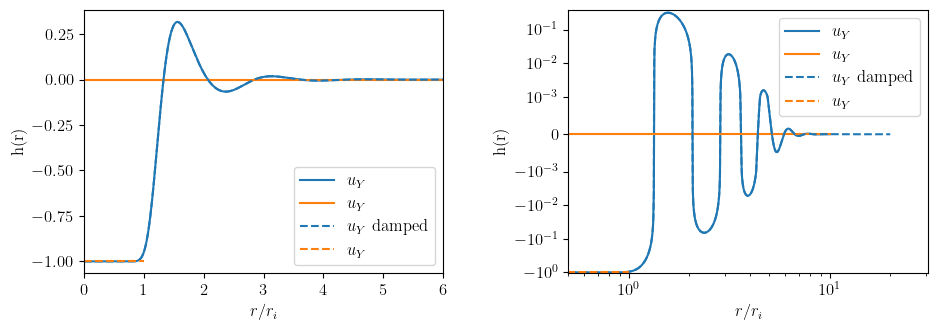

In [3]:
fig, axs  = plt.subplots(1,2,figsize=(10,4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ax in axs:
    ax.plot(npa_tfd.iet.r_array, npa_tfd.iet.h_r_matrix[0,0], color=colors[0], label=r"$u_Y$")
    ax.plot(aa_tfd.iet.r_array, aa_tfd.iet.h_r_matrix[0,0],color=colors[1],  label=r"$u_Y$")
    ax.plot(npa_tfd.grid.xs/rs, npa_tfd.gii-1,'--',color=colors[0],  label=r"$u_Y$ damped")
    ax.plot(aa_tfd.grid.xs/rs, aa_tfd.gii-1,'--',color=colors[1],  label=r"$u_Y$")

ax = axs[0]
ax.set_xlabel(r"$r/r_i$",fontsize=12)
ax.set_ylabel("h(r)",fontsize=12)
ax.set_xlim(0,6)

ax = axs[1]
ax.set_xlabel(r"$r/r_i$",fontsize=12)
ax.set_ylabel("h(r)",fontsize=12)
ax.set_xscale('log')
ax.set_xlim(0.5,None)
ax.set_yscale('symlog', linthresh=1e-3)
for ax in axs:
    ax.legend(fontsize=12)
    ax.tick_params(labelsize=12)


plt.tight_layout()



### Thomas Fermi (TF)

In [15]:
np.exp(-0.25*npa_tfd.kTF*npa_tfd.grid.xs),np.exp(-0.25*npa_tfd.kTF*20)

(array([9.97149756e-01, 9.96928434e-01, 9.96698877e-01, ...,
        4.09471205e-08, 4.02641493e-08, 3.95922406e-08]),
 0.003317222867851889)

In [4]:
aa_tfd.solve_TF(verbose=True, picard_alpha=2e-1, tol=1e-4)

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	mu =     0.0111, change: 9.2983e-01 (converged=False)
	Poisson Err = -1.242e-12, rho Err =  2.211e-02
	Q =  0.000e+00 -> -2.724e-01, 
	Zstar guess =  2.970e+00. Current Zstar:  3.154e+00 (converged=False)
	Change =  1.418e+00
__________________________________________
TF Iteration 1
	mu =     0.1748, change: 1.4770e+01 (converged=False)
	Poisson Err = -1.152e-12, rho Err =  1.804e-02
	Q = -2.724e-01 -> -2.858e-01, 
	Zstar guess =  3.319e+00. Current Zstar:  3.187e+00 (converged=False)
	Change =  1.045e+00
__________________________________________
TF Iteration 2
	mu =     0.2465, change: 4.0962e-01 (converged=False)
	Poisson Err = -1.209e-12, rho Err =  1.432e-02
	Q = -2.858e-01 -> -2.927e-01, 
	Zstar guess =  3.395e+00. Current Zstar:  3.229e+00 (converged=False)
	Change =  3.348e-01
__________________________________________
TF Iteration 3
	mu =     

True

In [5]:
npa_tfd.solve_TF(verbose=True, picard_alpha=0.1, tol=1e-7, nmax = 1e3)

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	mu =     0.4555, change: 4.8164e-05 (converged=True)
	Poisson Err =  1.245e-07, rho Err =  3.157e-03
	Q =  0.000e+00 ->  3.638e-12, 
	Zstar guess =  0.000e+00. Current Zstar:  3.300e+00 (converged=False)
	Change =  4.541e-01
__________________________________________
TF Iteration 1
	mu =     0.4554, change: 6.3502e-05 (converged=True)
	Poisson Err =  1.976e-10, rho Err =  7.644e-04
	Q =  3.638e-12 ->  3.638e-12, 
	Zstar guess =  0.000e+00. Current Zstar:  3.300e+00 (converged=False)
	Change =  9.181e-02
__________________________________________
TF Iteration 2
	mu =     0.4554, change: 2.6286e-05 (converged=True)
	Poisson Err = -6.573e-10, rho Err =  2.270e-04
	Q =  3.638e-12 ->  0.000e+00, 
	Zstar guess =  0.000e+00. Current Zstar:  3.300e+00 (converged=False)
	Change =  6.958e-02
__________________________________________
TF Iteration 3
	mu =     0.4


KeyboardInterrupt



In [6]:
# indices = np.arange(len(npa_tfd.grid.xs))[::100]
# Zbars = []
# φ_shifts = []
# ηs = npa_tfd.TF.η_interp(npa_tfd.ne)[::100]
# for i, cutoff_index in enumerate(indices):
#     φ_shift = ηs[i]*npa_tfd.T #- npa_tfd.μ#npa_tfd.φe[cutoff_index] + npa_tfd.φion[cutoff_index] -npa_tfd.vxc_f(npa_tfd.ne)[cutoff_index]
#     φ_shifts.append(φ_shift)
#     npa_tfd.make_bound_free(φ_shift)
#     Zbars.append(npa_tfd.Z - npa_tfd.grid.integrate_f(npa_tfd.n_b))

In [7]:
# fig, ax = plt.subplots(figsize=(8,6))

# ax.plot(npa_tfd.grid.xs[indices], φ_shifts)
# ax.plot(npa_tfd.grid.xs[indices], np.array(ηs)*npa_tfd.T - npa_tfd.μ ,'--' )

# ax2 = ax.twinx()
# ax2.plot(npa_tfd.grid.xs[indices], Zbars,'r--.')

# ax.legend(fontsize=12)
# ax.tick_params(labelsize=12)
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax2.set_ylim(3,13)

In [8]:
# from scipy.optimize import root

# def φ_shift_min_func(φ_shift):
#     npa_tfd.make_bound_free(φ_shift)
#     return (npa_tfd.Z - npa_tfd.grid.integrate_f(npa_tfd.n_b)) - npa_tfd.Zstar

# # φ_shift_min_func(0.29)
# sol = root(φ_shift_min_func, 0.29)
# npa_tfd.make_bound_free(sol.x)
# sol, npa_tfd.Z - npa_tfd.grid.integrate_f(npa_tfd.n_b), npa_tfd.Zstar

## Comparison

(<Figure size 2000x800 with 2 Axes>,
 array([<Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$\\phi$ [A.U.]'>,
        <Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$n$ [A.U.]'>],
       dtype=object))

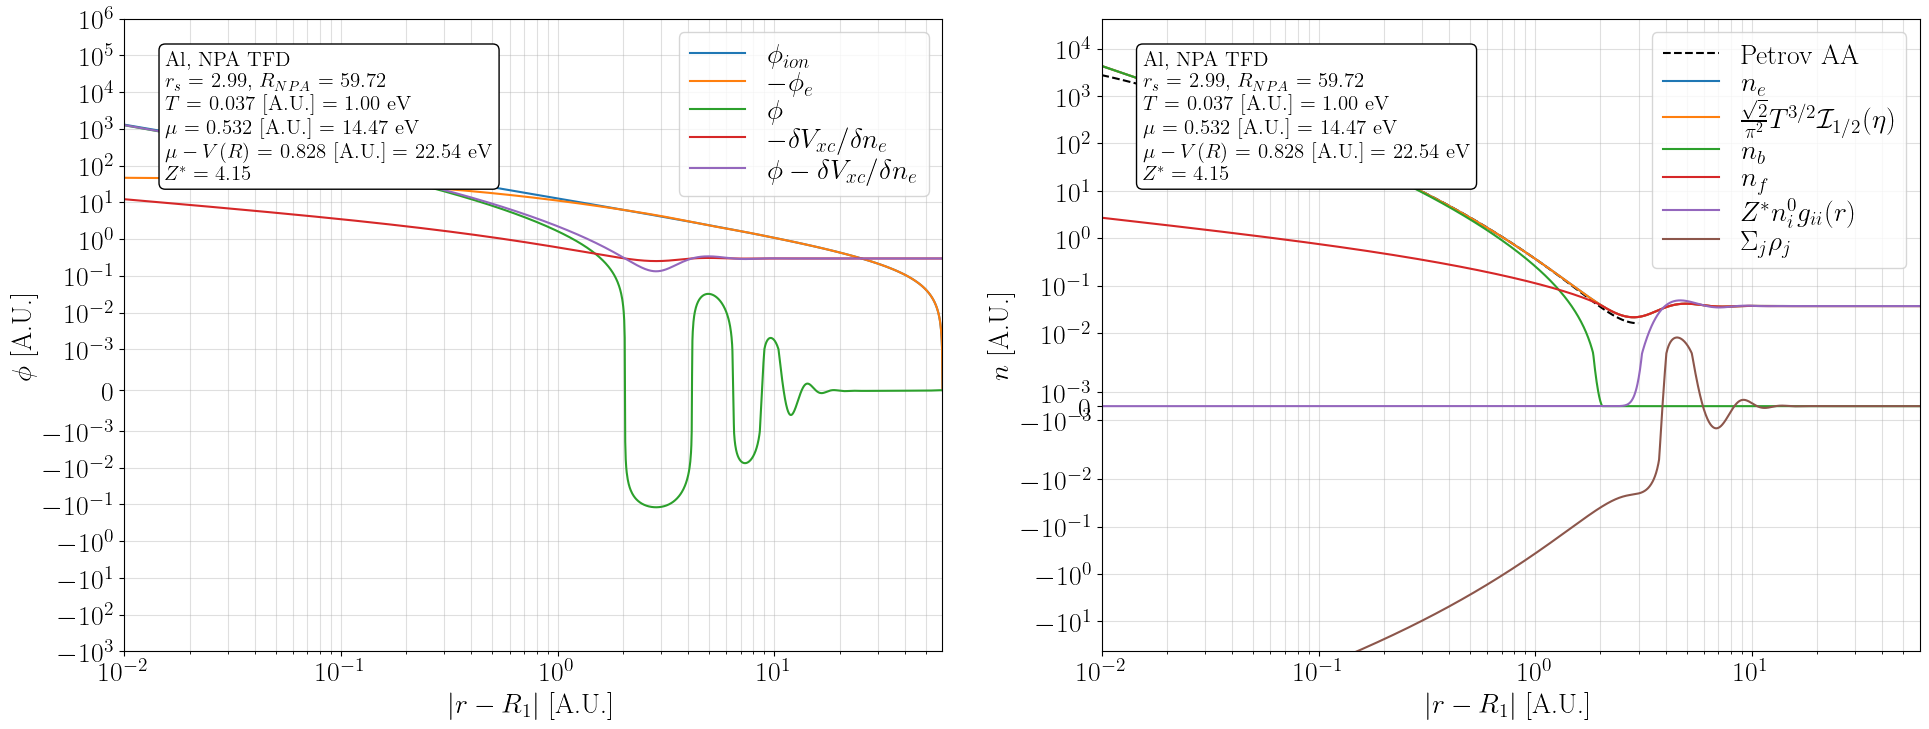

In [5]:
npa_tfd.make_plots()

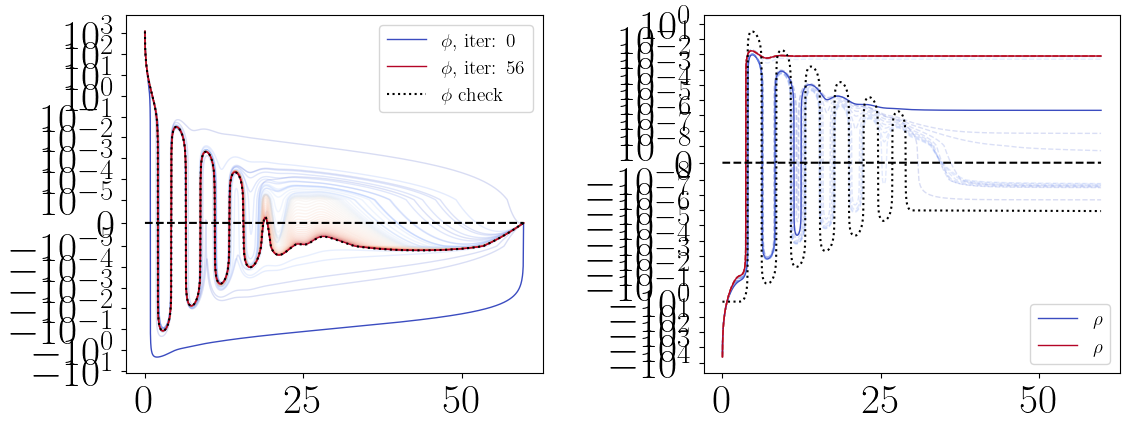

In [10]:
def plot_convergence(aa, axs=None):
    if axs is None:
        fig, axs = plt.subplots(ncols=2,figsize=(12,5),facecolor='w')
    
    # ELectric potential
    slice_by_num = 10
    ax = axs[0]
    colors = plt.cm.coolwarm(np.linspace(0, 1,len(aa.φe_list[::slice_by_num])))
    for i, φe in enumerate(aa.φe_list[::slice_by_num]):
        if i ==0 or i==len(aa.φe_list[::slice_by_num])-1:
            ax.plot(aa.grid.xs, (φe+aa.φion),linewidth=1,color=colors[i],alpha=1, label=r'$\phi$, iter: {0}'.format(i))
        else:
            ax.plot(aa.grid.xs, φe+aa.φion,linewidth=1,color=colors[i],alpha=0.2)
    ax.plot(aa.grid.xs, aa.get_φe( (aa.ρi - aa.ne) )[0] + aa.φion  ,'k:', label=r'$\phi$ check' )
    # npa_tfd.set_μ_TF()
    # ax.plot(aa.grid.xs, aa.get_φe(aa.ρi - aa.ne*aa.ρi[-1]/aa.ne[-1])[0] + aa.φion,'k-' )
    ax.set_yscale('symlog',linthresh=1e-5)

    # number density
    ax = axs[1]
    for i, (ne, ρi) in enumerate(zip(aa.ne_list, aa.ρi_list[::slice_by_num])):
        if i ==0 or i==len(aa.ne_list[::slice_by_num])-1:
            # ax.plot(aa.grid.xs, -ne + 0*ρi + ne[-1],linewidth=1,color=colors[i],alpha=1, label=r'$\rho$'.format(i))
            ax.plot(aa.grid.xs, -ne + ρi,linewidth=1,color=colors[i],alpha=1, label=r'$\rho$'.format(i))
            pass
        else:
            # ax.plot(aa.grid.xs, -ne + 0*ρi + ne[-1],linewidth=1,color=colors[i],alpha=0.3)
            ax.plot(aa.grid.xs, -ne + ρi ,linewidth=1,linestyle='--',color=colors[i],alpha=0.2)
            # short_distance_weight = np.exp(-0.1*npa_tfd.kTF*npa_tfd.grid.xs)
            # ne_fake = ne*short_distance_weight + (1-short_distance_weight)*ρi
            # ax.plot(aa.grid.xs, -ne_fake + ρi ,linewidth=1,color=colors[i],alpha=0.2)
    
    ax.plot(aa.grid.xs, (aa.gii)-1, 'k:')
    # ax.plot(aa.grid.xs, (aa.gii-1)*np.exp(-0.01*(aa.kTF*aa.grid.xs)**2), 'k:')
    # ax.plot(aa.grid.xs, aa.get_φe(aa.ρi - aa.ne)[0] + aa.φion,'k:', label=r'$\phi$ check' )
    # npa_tfd.set_μ_TF()
    # ax.plot(aa.grid.xs, aa.get_φe(aa.ρi - aa.ne*aa.ρi[-1]/aa.ne[-1])[0] + aa.φion,'k-' )
    ax.set_yscale('symlog',linthresh=1e-8)
    # ax.set_xlim(0.9*rs, None)
    # ax.set_ylim(-0.1,1e-2)
    for ax in axs:
        ax.legend(fontsize=14)
        # ax.set_xscale('log')
        ax.plot(aa.grid.xs, np.zeros_like(aa.ne),'k--')
    plt.tight_layout()
plot_convergence(npa_tfd)
# plot_convergence(npa_tfd)

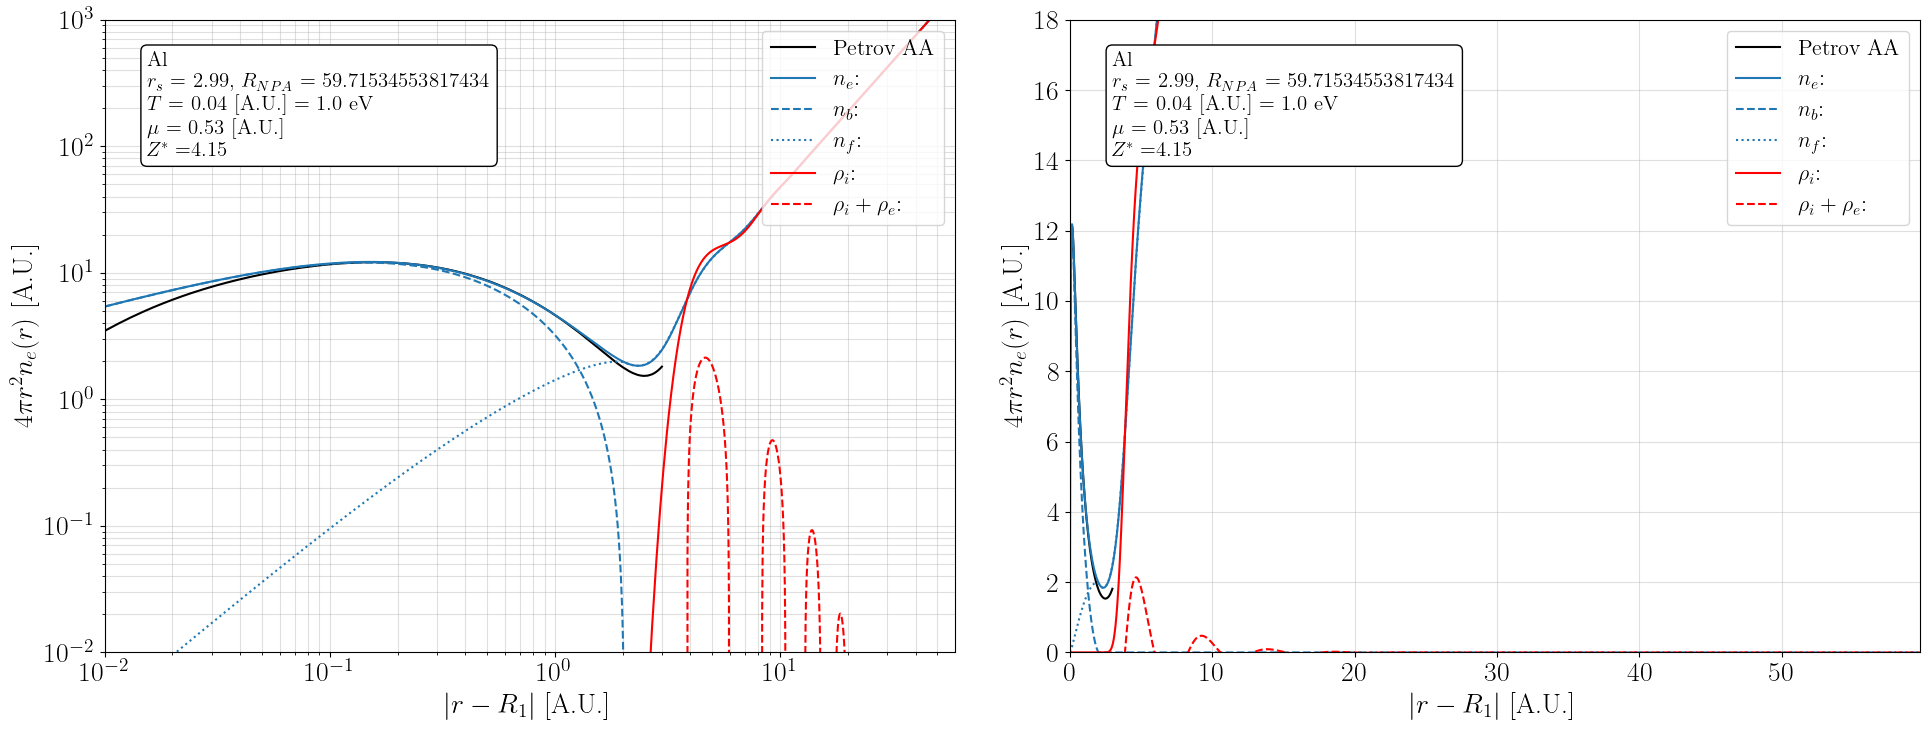

In [11]:

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def make_plot_bound_free(aa, axs=None, name='', color=colors[0]):
    eV = 0.0367512 # So 4 eV = 4 * 0.036.. in natural units
    if axs is None:
        fig, axs = plt.subplots(ncols=2,figsize=(20,8),facecolor='w')

    # Density * 4pi r^2 plot
    factor = 4*np.pi*aa.grid.xs**2
    axs[0].plot(aa.petrov.r_data, 4*np.pi*aa.petrov.r_data**2*(aa.petrov.rho_data + aa.petrov.rho_0), 'k-', label="Petrov AA")
    axs[0].plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
    axs[0].plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
    axs[0].plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
    if aa.rs != aa.R:
        axs[0].plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
        axs[0].plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)
    # axs[0].plot(aa.grid.xs, aa.δn_f*factor,'--',color='g',  label=r'$n_e^{sc}$: ' + name)


    axs[0].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[0].set_ylim(1e-2, 1e3)
    axs[0].set_yscale('log')#,linthresh=1e-6)
    axs[0].set_xscale('log')
    axs[0].set_xlim(aa.grid.xs[0],aa.grid.xs[-1])

    
    # Density * 4pi r^2 plot
    factor = 4*np.pi*aa.grid.xs**2
    axs[1].plot(aa.petrov.r_data, 4*np.pi*aa.petrov.r_data**2*(aa.petrov.rho_data + aa.petrov.rho_0), 'k-', label="Petrov AA")
    axs[1].plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
    axs[1].plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
    axs[1].plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
    if aa.rs != aa.R:
        axs[1].plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
        axs[1].plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)


    axs[1].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[1].set_ylim(0, 18)
    axs[1].set_xlim(0,aa.R)

        
    for ax in axs:
        ax.set_xlabel(r'$|r-R_1|$ [A.U.]',fontsize=20)
        ax.legend(loc="upper right",fontsize=20,labelspacing = 0.1)
        ax.tick_params(labelsize=20)
        ax.grid(which='both',alpha=0.4)

        # make textbox
        text = ("{0}\n".format(aa.name)+ 
            r"$r_s$ = " + "{0},    ".format(np.round(aa.rs,2)) +
            r"$R_{NPA}$ = " + "{0}\n".format(aa.R)  +
                r"$T$ = " + "{0} [A.U.] = {1} eV\n".format(np.round(aa.T,2),np.round(aa.T/eV,2)) + r"$\mu$ = " + "{0} [A.U.]\n".format(np.round(aa.μ,2)) +
                r"$Z^\ast = $" + "{0}".format(np.round(aa.Zstar,2))  )

        props = dict(boxstyle='round', facecolor='w')
        ax.text(0.05,0.95, text, fontsize=15, transform=ax.transAxes, verticalalignment='top', bbox=props)

    plt.tight_layout()
    name = "NPA_densities_{0}_rs{1}_{2}eV_R{3}.png".format(aa.name, np.round(aa.rs,2), np.round(aa.T/eV,2) ,np.round(aa.R))
    plt.savefig("/home/zach/plasma/atomic_forces/average_atom/media/" + name, dpi=300, bbox_inches='tight',facecolor="w")
    
    
    return axs


axs = make_plot_bound_free(npa_tfd, color=colors[0])
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='upper right')
# axs[1].set_ylim(1e-5,1e3)

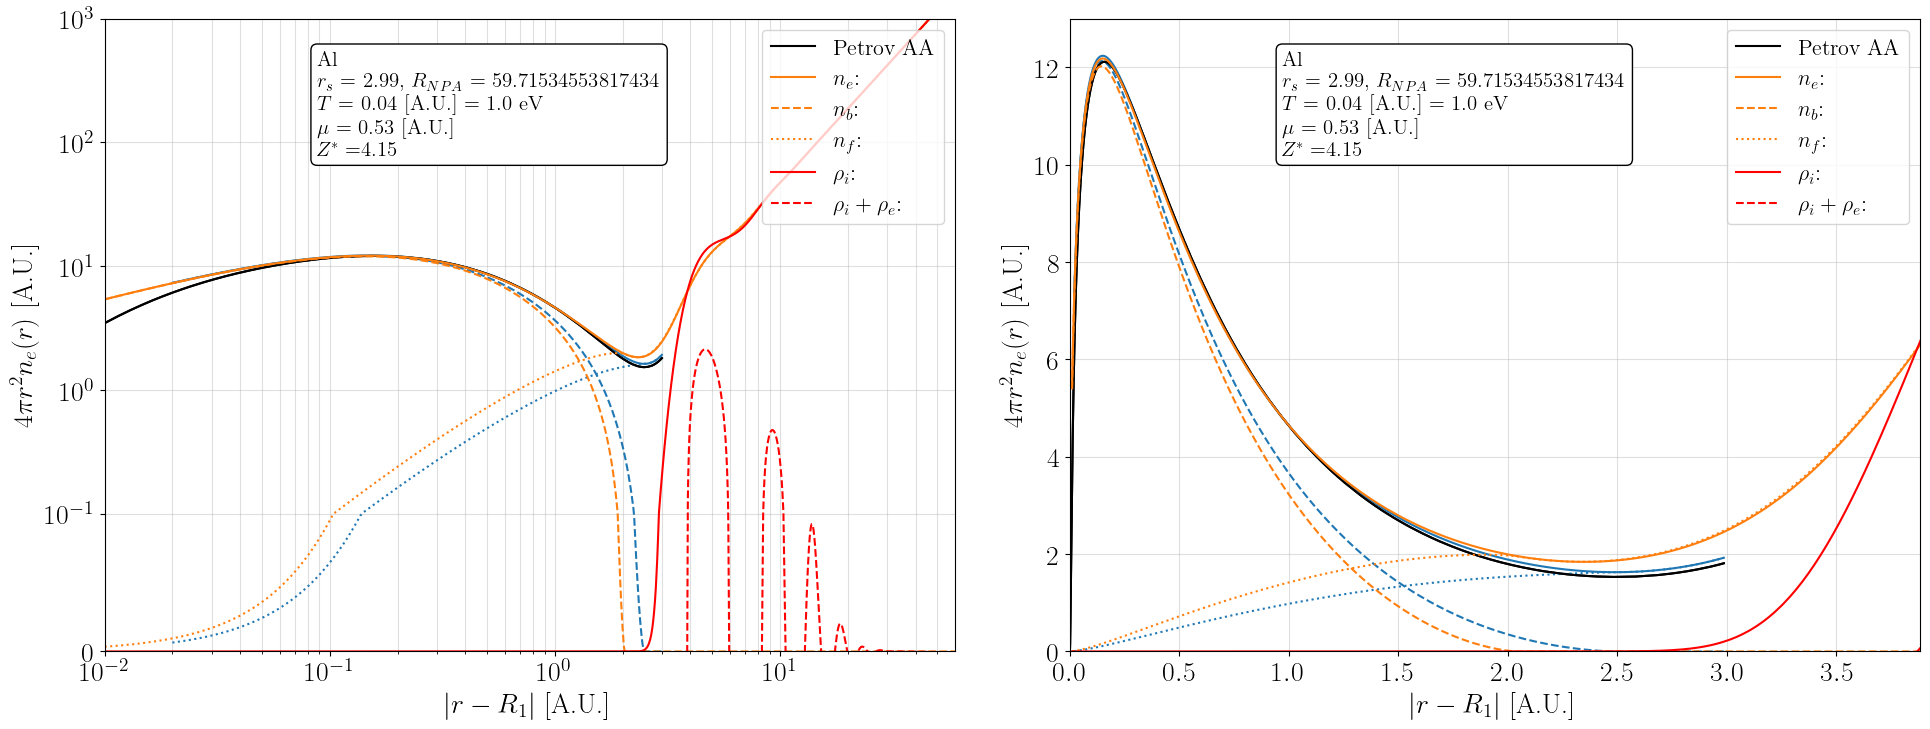

In [12]:

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def compare_aa(aa_list, axs=None, name=''):
    eV = 0.0367512 # So 4 eV = 4 * 0.036.. in natural units
    if axs is None:
        fig, axs = plt.subplots(ncols=2,figsize=(20,8),facecolor='w')

    # Density * 4pi r^2 plot
    for ax in axs:
        for aa, color in zip( aa_list, colors):
            factor = 4*np.pi*aa.grid.xs**2
            ax.plot(aa.petrov.r_data, 4*np.pi*aa.petrov.r_data**2*(aa.petrov.rho_data + aa.petrov.rho_0), 'k-', label="Petrov AA")
            ax.plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
            ax.plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
            ax.plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
            if aa.rs != aa.R:
                ax.plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
                ax.plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)
        # axs[0].plot(aa.grid.xs, aa.δn_f*factor,'--',color='g',  label=r'$n_e^{sc}$: ' + name)


    axs[0].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[0].set_ylim(0, 1e3)
    axs[0].set_yscale('symlog',linthresh=1e-1)
    axs[0].set_xscale('log')
    axs[0].set_xlim(aa.grid.xs[0],aa.grid.xs[-1])

    axs[1].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[1].set_ylim(0, 13)
    axs[1].set_xlim(0, np.min([aa.R,1.3*aa.rs]))

        
    for ax in axs:
        ax.set_xlabel(r'$|r-R_1|$ [A.U.]',fontsize=20)
        ax.legend(loc="upper right",fontsize=20,labelspacing = 0.1)
        ax.tick_params(labelsize=20)
        ax.grid(which='both',alpha=0.4)

        # make textbox
        text = ("{0}\n".format(aa.name)+ 
            r"$r_s$ = " + "{0},    ".format(np.round(aa.rs,2)) +
            r"$R_{NPA}$ = " + "{0}\n".format(aa.R)  +
                r"$T$ = " + "{0} [A.U.] = {1} eV\n".format(np.round(aa.T,2),np.round(aa.T/eV,2)) + r"$\mu$ = " + "{0} [A.U.]\n".format(np.round(aa.μ,2)) +
                r"$Z^\ast = $" + "{0}".format(np.round(aa.Zstar,2))  )

        props = dict(boxstyle='round', facecolor='w')
        ax.text(0.25,0.95, text, fontsize=15, transform=ax.transAxes, verticalalignment='top', bbox=props)

    plt.tight_layout()
    name = "NPA_densities_{0}_rs{1}_{2}eV_R{3}.png".format(aa.name, np.round(aa.rs,2), np.round(aa.T/eV,2) ,np.round(aa.R))
    plt.savefig("/home/zach/plasma/atomic_forces/average_atom/media/" + name, dpi=300, bbox_inches='tight',facecolor="w")
    
    
    return axs


axs = compare_aa([aa_tfd, npa_tfd])
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='upper right')
# axs[1].set_ylim(1e-5,1e3)

## HNC and FT

In [13]:
from hnc.hnc.misc import Fermi_Energy, n_from_rs, Debye_length

E_Fermi = Fermi_Energy(aa_tfd.Zstar* n_from_rs(rs))
kF = (2*E_Fermi)**(1/2)
kTF = 1/Debye_length(T_AU,n_from_rs(rs), aa_tfd.Zstar)

def χ0_Lindhard(k):
    ktilde = k/(2*kF) 
    Ndos = kF/π**2
    χ0 = Ndos *(1/2 + 1/(4*ktilde)*(1-ktilde**2)*np.log(abs( (ktilde+1)/(ktilde-1) )) )#Lindhard
    return -χ0

def G_SLFC(k):
    """
    Taylor 1978 - https://iopscience.iop.org/article/10.1088/0305-4608/8/8/011/pdf
    Rewritting their math I get
    χ = χ0/(1-χ0 Uee) for Uee = vee (1-G) and vee = 4π/k**2
      = -Π0/(1 + vee(1-k**2 φ)Π0)
      
    Unforunately, I'm not sure of the sign between χ0 and Π0, so I'm not sure of the overall sign, but G is fine.
    """
    λ = (π*kF)**-1
    φ0 = (1 + 0.1534 * λ)/(4*kF**2)
    G = k**2*φ0
    return G
    
    
def χ_Lindhard(k):
    χ0 = χ0_Lindhard(k)
    vee = 4*π/k**2
    G = G_SLFC(k)
    Uee = vee*(1-G)
    χ_renorm = χ0/(1 - χ0* Uee) 
    return χ_renorm

def χ_TF(k):
    χ_lowk = +k**2/(4*π)* kTF**2/(kTF**2 + k**2)  # Low-k full but full renormalized χ
    vee = 4*π/k**2
    χ_lowk =  -1/( vee + 4*π/kTF**2)  # rewritten
    return χ_lowk


    
# fig, ax = plt.subplots()

# k_dense = np.geomspace(1e-2, 1e2, num=100)

# ax.plot(k_dense, χ0_Lindhard(k_dense))
# ax.plot(k_dense, χ_Lindhard(k_dense))
# ax.axvline(2*kF,color='k')
# # ax.set_yscale('symlog')
# ax.set_xscale('log')
# plt.tight_layout()

In [14]:
def make_φpseudo(aa):
    nf = aa.n_f.copy() #+ aa.ni_bar
    nf = np.where(nf<=1e-30, 1e-30, nf)
        
    etas = aa.TF.η_interp(nf) # η = β( μ + self.φe + self.φion - self.vxc_f(ne)  )         
    totφ_pseudo = etas*aa.T + aa.vxc_f(nf) - aa.vxc_f(aa.ne_bar)  - aa.μ # total potential that must be acting on nf
    φe_from_nf, _ = aa.get_φe( (-nf + aa.ρi)  ) # potential from nf itself
    φe_from_ne, _ = aa.get_φe( (-aa.ne + aa.ρi)  ) # potential from nf itself

    φ_pseudo = (totφ_pseudo - φe_from_nf)
    φ_pseudo = φ_pseudo + aa.Zstar/aa.R#aa.Zstar/aa.R #- φ_pseudo[-1] # residual is just potential (and μ) from the ion and bound states
    # φ_pseudo = φ_pseudo + 4.10195374/aa.R#aa.Zstar/aa.R #- φ_pseudo[-1] # residual is just potential (and μ) from the ion and bound states
    return φ_pseudo, φe_from_nf, φe_from_ne, totφ_pseudo, etas

Uei_aa, φf_aa, φe_aa, Vtot_aa, ηs_aa = make_φpseudo(aa_tfd)
Uei_npa, φf_npa, φe_npa, Vtot_npa, ηs_npa = make_φpseudo(npa_tfd)

In [15]:
from hnc.hnc.hnc import Integral_Equation_Solver as IET
from scipy.interpolate import interp1d

Γ = aa_tfd.Zstar**2/T_AU/rs
κ = kTF*rs

iet = IET(1, Γ, 3/(4*π), T_AU, 1, kappa=κ, R_max = R/rs, N_bins=2000, dst_type=3, bridge=None)
    
u_k_Y_approx_npa = 4*π*npa_tfd.Zstar**2/(  (iet.k_array/rs)**2 + κ**2)
u_r_Y_approx_npa = npa_tfd.Zstar**2/(iet.r_array*rs)*np.exp(-κ*iet.r_array)

u_k_Y_approx_aa = 4*π*aa_tfd.Zstar**2/(  (iet.k_array/rs)**2 + κ**2)
u_r_Y_approx_aa = aa_tfd.Zstar**2/(iet.r_array*rs)*np.exp(-κ*iet.r_array)

# First Uei
# NPA Uei
# Uei_npa_iet = interp1d(npa_tfd.grid.xs/rs, Uei_npa , bounds_error=False, fill_value='extrapolate')(iet.r_array)
# Uei_npa_iet_k = rs**3* iet.FT_r_2_k( Uei_npa_iet)# + 4*π*npa_tfd.Zstar/(iet.k_array/rs)**2

Uei_npa_iet_interp = interp1d(npa_tfd.grid.xs, Uei_npa , bounds_error=False, fill_value='extrapolate')
@np.vectorize
def get_Uei_NPA(r):
    if r<npa_tfd.grid.xs[0]:
        return Uei_aa[0]
    elif r>npa_tfd.grid.xs[-1]:
        return npa_tfd.Zstar/r
    else:
        return Uei_npa_iet_interp(r)
Uei_npa_iet = get_Uei_NPA(iet.r_array*rs)
Uei_npa_iet_k = rs**3*iet.FT_r_2_k( Uei_npa_iet)

nf_npa_iet = interp1d(npa_tfd.grid.xs, npa_tfd.n_f , bounds_error=False, fill_value='extrapolate')(iet.r_array*rs)
nf_npa_iet_k = rs**3*iet.FT_r_2_k( nf_npa_iet)


# AA Uei
Uei_aa_iet_interp = interp1d(aa_tfd.grid.xs, Uei_aa , bounds_error=False, fill_value='extrapolate')
@np.vectorize
def get_Uei_AA(r):
    if r<aa_tfd.grid.xs[0]:
        return Uei_aa[0]
    elif r>aa_tfd.grid.xs[-1]:
        return aa_tfd.Zstar/r
    else:
        return Uei_aa_iet_interp(r)
Uei_aa_iet = get_Uei_AA(iet.r_array*rs)
Uei_aa_iet_k = rs**3*iet.FT_r_2_k( Uei_aa_iet)

# Now Uii
uii_aa_k = 4*π*aa_tfd.Zstar**2/(iet.k_array/rs)**2 + χ_Lindhard(iet.k_array/rs)*Uei_aa_iet_k**2 - u_k_Y_approx_aa
uii_aa_k_matrix = np.array([[ uii_aa_k ]])
uii_aa_r = iet.FT_k_2_r(uii_aa_k*rs**-3) + u_r_Y_approx_aa


uii_npa_k = 4*π*npa_tfd.Zstar**2/(iet.k_array/rs)**2 + χ_Lindhard(iet.k_array/rs)*Uei_npa_iet_k**2 - u_k_Y_approx_npa
uii_npa_k_matrix = np.array([[ uii_npa_k ]])
uii_npa_r = iet.FT_k_2_r(uii_npa_k*rs**-3) + u_r_Y_approx_npa

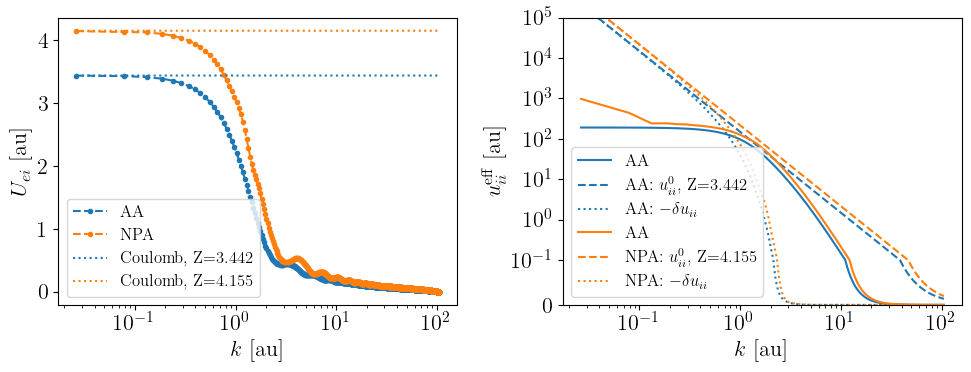

In [16]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['font.size'] =  16
plt.rcParams['legend.fontsize'] = 12
# Plot and Compare
fig, axs = plt.subplots(1,2, figsize=(10,4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

axs[0].plot(iet.k_array/rs, Uei_aa_iet_k*(iet.k_array/rs)**2/(4*π) ,'--.',color=colors[0], label="AA" ) # Need to muultiply by some rs power???
axs[0].plot(iet.k_array/rs, Uei_npa_iet_k*(iet.k_array/rs)**2/(4*π) ,'--.',color=colors[1], label="NPA") # Need to muultiply by some rs power???
axs[0].plot(iet.k_array/rs, aa_tfd.Zstar*np.ones_like(iet.k_array),':', color=colors[0], label=f"Coulomb, Z={aa_tfd.Zstar:0.3f}")
axs[0].plot(iet.k_array/rs, npa_tfd.Zstar*np.ones_like(iet.k_array),':',color=colors[1], label=f"Coulomb, Z={npa_tfd.Zstar:0.3f}")

# axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel(r"$k$ [au]")
axs[0].set_ylabel(r"$U_{ei}$ [au]")

axs[1].plot(iet.k_array/rs, uii_aa_k,'-', color=colors[0], label="AA")
axs[1].plot(iet.k_array/rs, 4*π*aa_tfd.Zstar**2/(iet.k_array/rs)**2,'--', color=colors[0], label=r"AA: $u_{{ii}}^0$, Z={0:0.3f}".format(aa_tfd.Zstar))
axs[1].plot(iet.k_array/rs, -χ_Lindhard(iet.k_array/rs)*Uei_aa_iet_k**2, ':',color=colors[0], label=r"AA: $-\delta u_{ii}$")
# axs[1].plot(iet.k_array/rs, 4*π*aa_tfd.Zstar**2/(iet.k_array/rs)**2 + χ_Lindhard(iet.k_array/rs)*Uei_aa_iet_k**2, color=colors[2])


axs[1].plot(iet.k_array/rs, uii_npa_k,color=colors[1], label="AA")
axs[1].plot(iet.k_array/rs, 4*π*npa_tfd.Zstar**2/(iet.k_array/rs)**2,'--', color=colors[1], label=r"NPA: $u_{{ii}}^0$, Z={0:0.3f}".format(npa_tfd.Zstar))
axs[1].plot(iet.k_array/rs, -χ_Lindhard(iet.k_array/rs)*Uei_npa_iet_k**2 ,':', color=colors[1], label=r"NPA: $-\delta u_{ii}$")
# axs[1].plot(iet.k_array/rs, 4*π*npa_tfd.Zstar**2/(iet.k_array/rs)**2 + χ_Lindhard(iet.k_array/rs)*Uei_npa_iet_k**2 ,'--.', color=colors[2])


axs[1].set_yscale('symlog',linthresh=1e-1)
axs[1].set_ylim(0,1e5)
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$k$ [au]")
axs[1].set_ylabel(r"$u^{\rm eff}_{ii}$ [au]")


for ax in axs:
    ax.legend(fontsize=12)
plt.tight_layout()

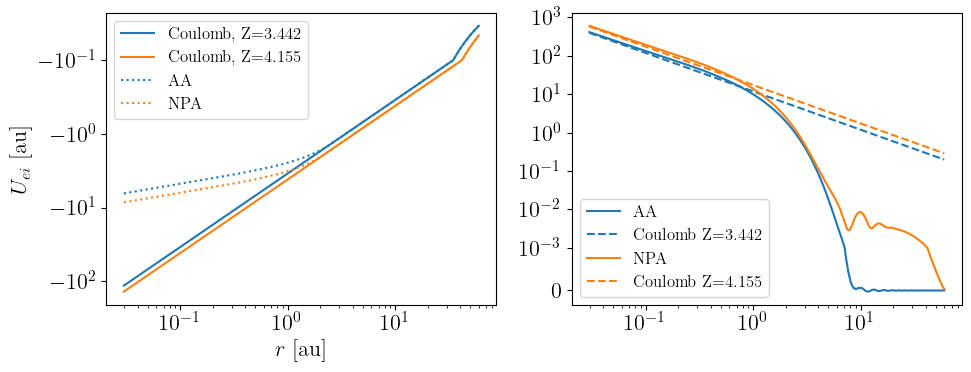

In [17]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['font.size'] =  16
plt.rcParams['legend.fontsize'] = 12
# Plot and Compare
fig, axs = plt.subplots(1,2, figsize=(10,4))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

axs[0].plot(iet.r_array*rs, -aa_tfd.Zstar/(iet.r_array*rs), color=colors[0], label=f"Coulomb, Z={aa_tfd.Zstar:0.3f}")
axs[0].plot(iet.r_array*rs, -npa_tfd.Zstar/(iet.r_array*rs),color=colors[1], label=f"Coulomb, Z={npa_tfd.Zstar:0.3f}")
axs[0].plot(iet.r_array*rs, -Uei_aa_iet ,':',color=colors[0], label="AA" ) # Need to muultiply by some rs power???
axs[0].plot(iet.r_array*rs, -Uei_npa_iet ,':',color=colors[1], label="NPA") # Need to muultiply by some rs power???
# axs[0].plot(iet.r_array*rs, -Uei_npa_iet/(npa_tfd.Zstar/(iet.r_array*rs)) ,':',color=colors[1], label="NPA") # Need to muultiply by some rs power???
# axs[0].plot(iet.r_array*rs, -nf_npa_iet ,'-',color=colors[2], label="n_f") # Need to muultiply by some rs power???


axs[0].set_yscale('symlog',linthresh=1e-1)
axs[0].set_xscale('log')
axs[0].set_xlabel(r"$r$ [au]")
axs[0].set_ylabel(r"$U_{ei}$ [au]")

axs[1].plot(iet.r_array*rs, uii_aa_r, color=colors[0],linestyle='-', label='AA')
axs[1].plot(iet.r_array*rs, aa_tfd.Zstar**2/(iet.r_array*rs ), color=colors[0] ,linestyle='--', label=f'Coulomb Z={aa_tfd.Zstar:0.3f}')
axs[1].plot(iet.r_array*rs, uii_npa_r, color=colors[1],linestyle='-', label='NPA')
axs[1].plot(iet.r_array*rs, npa_tfd.Zstar**2/(iet.r_array*rs ), color=colors[1],linestyle='--', label=f'Coulomb Z={npa_tfd.Zstar:0.3f}' )

axs[1].set_yscale('symlog',linthresh=1e-3)
axs[1].set_xscale('log')


for ax in axs:
    ax.legend()
plt.tight_layout()

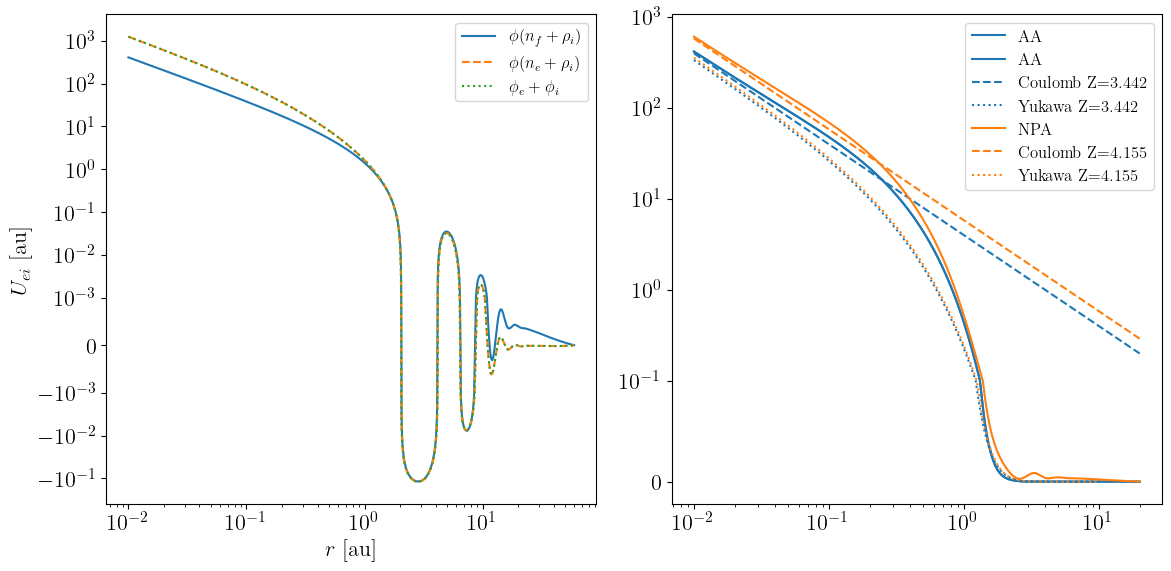

In [18]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['font.size'] =  16
plt.rcParams['legend.fontsize'] = 12
# Plot and Compare
fig, axs = plt.subplots(1,2, figsize=(12,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# axs[0].plot(iet.r_array*rs, -Uei_npa_iet/(npa_tfd.Zstar/(iet.r_array*rs))+1 ,':', label="Uei/(Z/r)-1") # Need to muultiply by some rs power???
# axs[0].plot(npa_tfd.grid.xs, npa_tfd.φe + npa_tfd.φion   ,':', label=r"$\phi$") # Need to muultiply by some rs power???
# axs[0].plot(npa_tfd.grid.xs, npa_tfd.n_f - npa_tfd.ρi   ,':', label=r"$n_f - \rho_i$") # Need to muultiply by some rs power???

# axs[0].plot(npa_tfd.grid.xs, -2e-2*(npa_tfd.Zstar/npa_tfd.grid.xs - npa_tfd.Zstar/npa_tfd.grid.xmax )   ,'-', label=r"$\phi (n_f + \rho_i)$") # Need to muultiply by some rs power???
axs[0].plot(npa_tfd.grid.xs, φf_npa + (npa_tfd.Zstar/npa_tfd.grid.xs - npa_tfd.Zstar/npa_tfd.grid.xmax )   ,'-', label=r"$\phi (n_f + \rho_i)$") # Need to muultiply by some rs power???
axs[0].plot(npa_tfd.grid.xs, φe_npa + (Z/npa_tfd.grid.xs - Z/npa_tfd.grid.xmax )  ,'--', label=r"$\phi (n_e + \rho_i)$") # Need to muultiply by some rs power???
axs[0].plot(npa_tfd.grid.xs, (npa_tfd.φe + npa_tfd.φion)   ,':', label=r"$\phi_e + \phi_i$") # Need to muultiply by some rs power???
# axs[0].plot(npa_tfd.grid.xs, +npa_tfd.Zstar/npa_tfd.grid.xs   ,'--', label=r"$\phi (n_f + \rho_i)$") # Need to muultiply by some rs power???
# axs[0].plot(npa_tfd.grid.xs, Vtot_npa   ,':', label=r"$V_{tot}$") # Need to muultiply by some rs power???
# axs[0].plot(npa_tfd.grid.xs, ηs_npa   ,':', label=r"$\eta$") # Need to muultiply by some rs power???


axs[0].set_yscale('symlog',linthresh=1e-3)
axs[0].set_xscale('log')
# axs[0].set_xlim(rs*0.5,None)
axs[0].set_xlabel(r"$r$ [au]")
axs[0].set_ylabel(r"$U_{ei}$ [au]")

axs[1].plot(iet.r_array, uii_aa_r, color=colors[0],linestyle='-', label='AA')
axs[1].plot(iet.r_array, uii_aa_r, color=colors[0],linestyle='-', label='AA')
axs[1].plot(iet.r_array, aa_tfd.Zstar**2/(iet.r_array*rs ), color=colors[0] ,linestyle='--', label=f'Coulomb Z={aa_tfd.Zstar:0.3f}')
axs[1].plot(aa_tfd.iet.r_array, T_AU*aa_tfd.iet.βu_Yukawa[0,0], color=colors[0], linestyle=':', label=f'Yukawa Z={aa_tfd.Zstar:0.3f}' )

axs[1].plot(iet.r_array, uii_npa_r, color=colors[1],linestyle='-', label='NPA')
axs[1].plot(iet.r_array, npa_tfd.Zstar**2/(iet.r_array*rs ), color=colors[1],linestyle='--', label=f'Coulomb Z={npa_tfd.Zstar:0.3f}' )
axs[1].plot(npa_tfd.iet.r_array, T_AU*npa_tfd.iet.βu_Yukawa[0,0],':', color=colors[1],  label=f'Yukawa Z={npa_tfd.Zstar:0.3f}' )

axs[1].set_yscale('symlog',linthresh=1e-1)
axs[1].set_xscale('log')


for ax in axs:
    ax.legend()
plt.tight_layout()

In [19]:
# Set effectgive potentials
iet.set_βu_matrix( np.array([[uii_npa_r]])/npa_tfd.T )
# iet.set_βu_matrix( np.array([[npa_tfd.iet.βu_Yukawa[0,0]]]) )
# iet.set_βu_matrix( np.array([[npa_tfd.Zstar**2/(npa_tfd.iet.r_array*rs)]])/npa_tfd.T  )
iet.HNC_solve(num_iterations=1e4)
npa_tfd_gii = iet.h_r_matrix[0,0]+1

iet.set_βu_matrix( np.array([[uii_aa_r]])/aa_tfd.T )
iet.HNC_solve(num_iterations=1e4)
aa_tfd_gii = iet.h_r_matrix[0,0]+1


0: Initial condition Total Error: 3.241e+02
Exiting status 0, reverting to best index so far: 1745
Final iter:1746, Total Error: 9.982e-07
0: Initial condition Total Error: 2.340e+02
Exiting status 0, reverting to best index so far: 1718
Final iter:1719, Total Error: 9.904e-07


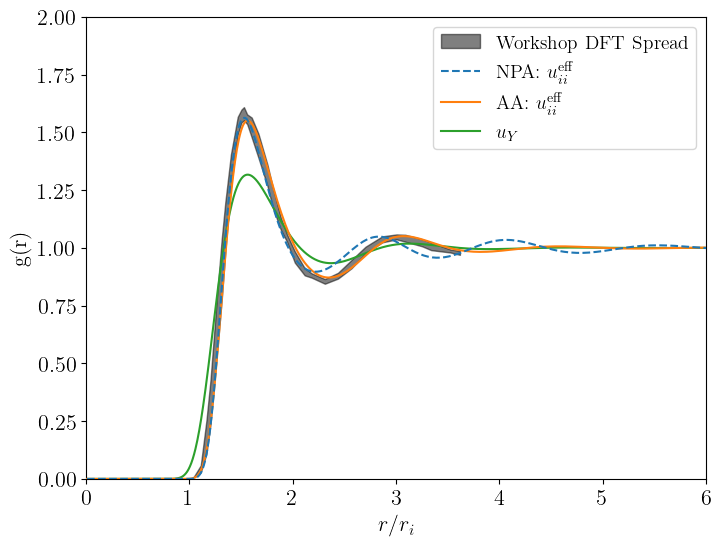

In [20]:
from scipy.interpolate import PchipInterpolator
from pandas import read_csv

fig, ax  = plt.subplots()

# Data from community TCCW
upper_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Upper.txt", delim_whitespace=True, header=1)
lower_data = read_csv("/home/zach/plasma/hnc/TCCW/Final_TCCW/Fig5c_Lower.txt", delim_whitespace=True, header=1)

ax.fill_between(lower_data['r/ri'],lower_data['gii'], PchipInterpolator(upper_data['r/ri'], upper_data['gii'])(lower_data['r/ri']), alpha=0.5, color='k', label='Workshop DFT Spread')


# Average atom effective potential to gii
ax.plot(iet.r_array, npa_tfd_gii,'--', label=r"NPA: $u_{ii}^{\rm eff}$", zorder=10)
ax.plot(iet.r_array, aa_tfd_gii, label=r"AA: $u_{ii}^{\rm eff}$", zorder=5)
ax.plot(npa_tfd.grid.xs/rs, npa_tfd.gii, label=r"$u_Y$")

ax.set_xlabel(r"$r/r_i$")
ax.set_ylabel("g(r)")
ax.set_xlim(0,6)
ax.set_ylim(0,2)
ax.legend(fontsize=14)
